<a href="https://colab.research.google.com/github/edmenciab733/clases/blob/main/regresion_lineal_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

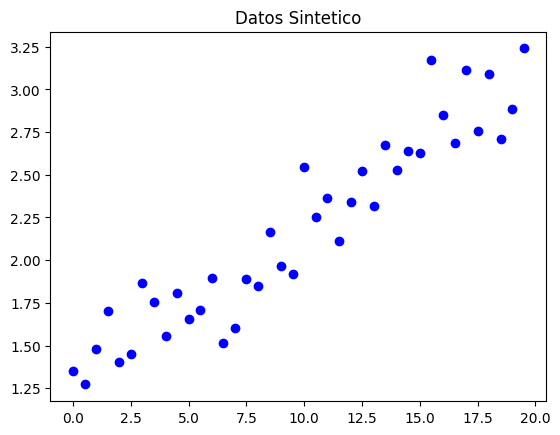

In [ ]:
%matplotlib inline

def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 20, 0.5) #rango de 0 a 20 con un salto de 0.5
y = f(x)
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos Sintetico');